# Importar Dependecias

In [29]:
import matplotlib
matplotlib.use("Agg")
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math 
import argparse
import pickle
import cv2
import os

# Cargar datos de entrenamiento

In [6]:
train = pd.read_csv("train.csv")

# Crear imagenes para entrenamiento
Se cargan cada video y se genera un secuencia de images por **Frames** para realizar el entrenamiento de la red ResNet50, adicionalmente se crea un archivo *.csv* con las imagnes etiquetadas

In [7]:
train_image = []
train_class = []
for i in tqdm(range(train.shape[0])):
    count = 0
    count_2 = 0
    videoFile = train['video_name'][i]
    class_video = train['tag'][i]
    path = 'all_data/'+videoFile
    print(path)
    cap = cv2.VideoCapture(path) 
    frameRate = cap.get(5)
    x=1
    while(cap.isOpened()):
        frameId = cap.get(1)
        ret, frame = cap.read()
        if (ret != True):
            break
        if (frameId % math.floor(frameRate) == 0):
            nameFile = videoFile +"__frame%d.jpg" % count
            train_image.append(nameFile)
            train_class.append(class_video)
            filename ='train_images/'+videoFile +"__frame%d.jpg" % count;count+=1
            cv2.imwrite(filename, frame)
    cap.release()
train_data = pd.DataFrame()
train_data['image'] = train_image
train_data['label'] = train_class
train_data.to_csv('train_new.csv',header=True, index=False)

  0%|                                                                                                                                                                                    | 0/48 [00:00<?, ?it/s]

all_data/F_0_1_0_0_0.mp4


  2%|███▌                                                                                                                                                                        | 1/48 [00:02<02:01,  2.59s/it]

all_data/F_1_0_1_0_1.mp4


  4%|███████▏                                                                                                                                                                    | 2/48 [00:02<00:54,  1.19s/it]

all_data/F_2_1_2_0_0.mp4


  6%|██████████▊                                                                                                                                                                 | 3/48 [00:03<00:43,  1.03it/s]

all_data/F_3_1_0_0_0.mp4


  8%|██████████████▎                                                                                                                                                             | 4/48 [00:04<00:48,  1.11s/it]

all_data/F_4_0_0_0_0.mp4


 10%|█████████████████▉                                                                                                                                                          | 5/48 [00:05<00:45,  1.05s/it]

all_data/F_5_1_2_0_0.mp4


 12%|█████████████████████▌                                                                                                                                                      | 6/48 [00:06<00:41,  1.01it/s]

all_data/F_6_1_2_0_0.mp4


 15%|█████████████████████████                                                                                                                                                   | 7/48 [00:07<00:36,  1.13it/s]

all_data/F_7_0_0_0_0.mp4


 19%|████████████████████████████████▎                                                                                                                                           | 9/48 [00:09<00:32,  1.19it/s]

all_data/F_8_1_0_0_0.mp4
all_data/F_9_1_2_0_0.mp4


 21%|███████████████████████████████████▋                                                                                                                                       | 10/48 [00:09<00:29,  1.28it/s]

all_data/N_0_0_0_1_0.mp4


 23%|███████████████████████████████████████▏                                                                                                                                   | 11/48 [00:10<00:29,  1.24it/s]

all_data/N_1_1_0_1_0.mp4


 25%|██████████████████████████████████████████▊                                                                                                                                | 12/48 [00:11<00:29,  1.23it/s]

all_data/N_2_1_0_1_0.mp4


 27%|██████████████████████████████████████████████▎                                                                                                                            | 13/48 [00:12<00:26,  1.30it/s]

all_data/N_3_0_0_1_0.mp4


 29%|█████████████████████████████████████████████████▉                                                                                                                         | 14/48 [00:14<00:41,  1.21s/it]

all_data/N_4_1_0_1_0.mp4


 31%|█████████████████████████████████████████████████████▍                                                                                                                     | 15/48 [00:15<00:35,  1.06s/it]

all_data/N_5_0_0_1_0.mp4


 33%|█████████████████████████████████████████████████████████                                                                                                                  | 16/48 [00:15<00:31,  1.03it/s]

all_data/N_6_0_0_1_0.mp4


 35%|████████████████████████████████████████████████████████████▌                                                                                                              | 17/48 [00:16<00:23,  1.30it/s]

all_data/N_7_0_0_1_0.mp4


 38%|████████████████████████████████████████████████████████████████▏                                                                                                          | 18/48 [00:17<00:24,  1.22it/s]

all_data/N_8_1_0_1_0.mp4


 40%|███████████████████████████████████████████████████████████████████▋                                                                                                       | 19/48 [00:17<00:23,  1.22it/s]

all_data/N_9_0_0_1_0.mp4


 42%|███████████████████████████████████████████████████████████████████████▎                                                                                                   | 20/48 [00:18<00:22,  1.27it/s]

all_data/N_16_1_0_1_0.mp4


 44%|██████████████████████████████████████████████████████████████████████████▊                                                                                                | 21/48 [00:19<00:21,  1.23it/s]

all_data/N_15_0_0_1_0.mp4


 46%|██████████████████████████████████████████████████████████████████████████████▍                                                                                            | 22/48 [00:19<00:17,  1.49it/s]

all_data/N_14_1_0_1_0.mp4


 48%|█████████████████████████████████████████████████████████████████████████████████▉                                                                                         | 23/48 [00:20<00:14,  1.76it/s]

all_data/N_13_0_0_1_0.mp4


 50%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                                     | 24/48 [00:21<00:18,  1.28it/s]

all_data/N_12_0_0_1_0.mp4


 52%|█████████████████████████████████████████████████████████████████████████████████████████                                                                                  | 25/48 [00:22<00:18,  1.24it/s]

all_data/N_11_1_0_1_0.mp4


 54%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 26/48 [00:23<00:17,  1.24it/s]

all_data/N_10_0_0_1_0.mp4


 56%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 27/48 [00:24<00:17,  1.19it/s]

all_data/F_10_0_0_0_0.mp4


 58%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                       | 28/48 [00:24<00:17,  1.17it/s]

all_data/F_11_0_2_0_0.mp4


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                   | 29/48 [00:26<00:19,  1.03s/it]

all_data/F_12_1_0_0_0.mp4


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                | 30/48 [00:27<00:18,  1.05s/it]

all_data/F_13_1_2_0_0.mp4


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 31/48 [00:29<00:22,  1.30s/it]

all_data/F_14_0_0_0_0.mp4


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                         | 32/48 [00:30<00:22,  1.38s/it]

all_data/F_15_0_0_0_0.mp4


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 33/48 [00:32<00:22,  1.52s/it]

all_data/F_16_1_2_0_0.mp4


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 34/48 [00:34<00:23,  1.66s/it]

all_data/N_17_0_0_1_0.mp4


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 35/48 [00:35<00:18,  1.41s/it]

all_data/N_18_0_0_1_0.mp4


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 36/48 [00:38<00:22,  1.87s/it]

all_data/N_19_0_0_1_0.mp4


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 37/48 [00:39<00:16,  1.54s/it]

all_data/F_19_1_1_0_0.mp4


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 38/48 [00:40<00:13,  1.31s/it]

all_data/F_18_0_1_0_1.mp4


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 39/48 [00:40<00:09,  1.01s/it]

all_data/F_17_1_0_0_1.mp4


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 40/48 [00:40<00:06,  1.17it/s]

all_data/F_20_1_1_0_0.mp4


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 41/48 [00:41<00:05,  1.30it/s]

all_data/F_21_0_0_0_0.mp4


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 42/48 [00:42<00:04,  1.33it/s]

all_data/F_22_1_1_0_1.mp4


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 43/48 [00:43<00:04,  1.19it/s]

all_data/F_23_0_0_0_0.mp4


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 44/48 [00:44<00:03,  1.07it/s]

all_data/F_24_1_0_0_0.mp4


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 45/48 [00:44<00:02,  1.21it/s]

all_data/F_25_1_2_0_0.mp4


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 46/48 [00:45<00:01,  1.29it/s]

all_data/F_26_1_2_0_0.mp4


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 47/48 [00:46<00:00,  1.37it/s]

all_data/F_28_0_0_0_0.mp4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 48/48 [00:46<00:00,  1.02it/s]


In [8]:
pathImages = pd.read_csv("train_new.csv")
pathImages.head()

,image,label
0,F_0_1_0_0_0.mp4__frame0.jpg,fight
1,F_0_1_0_0_0.mp4__frame1.jpg,fight
2,F_0_1_0_0_0.mp4__frame2.jpg,fight
3,F_0_1_0_0_0.mp4__frame3.jpg,fight
4,F_0_1_0_0_0.mp4__frame4.jpg,fight


# Preprocesando las imagenes

In [9]:
from keras.utils import load_img, img_to_array
print("[INFO] loading images...")
data = []
labels = []
for i in tqdm(range(pathImages.shape[0])):
    path = 'train_images/'+pathImages['image'][i]
    label = pathImages['label'][i]            
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    data.append(image)
    labels.append(label)

[INFO] loading images...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1478/1478 [00:18<00:00, 78.63it/s]


In [14]:
data = np.array(data)
labels = np.array(labels)

In [15]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

Se divide el set de imagenes en train y test 

In [16]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, stratify=labels, random_state=42)

In [17]:
trainAug = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")
valAug = ImageDataGenerator()
mean = np.array([123.68, 116.779, 103.939], dtype="float32")
trainAug.mean = mean
valAug.mean = mean

In [10]:
baseModel = ResNet50(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

2022-06-08 22:46:49.982509: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-08 22:46:49.983406: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/stiven/python/python/lib/python3.8/site-packages/cv2/../../lib64:
2022-06-08 22:46:49.983535: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/stiven/python/python/lib/python3.8/site-packages/cv2/../../lib64:
2022-06-08 22:46:49.983688: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; 

In [11]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(len(lb.classes_), activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)
for layer in baseModel.layers:
    layer.trainable = False

# Entrenamiento del modelo 

In [16]:
print("[NFO] compiling model...")
epochs=30
opt = SGD(lr=1e-3, momentum=0.9, decay=1e-3 / epochs)
model.compile(loss="binary_crossentropy", optimizer=opt,
    metrics=["accuracy"])
print("[INFO] training head...")
H = model.fit(
    x=trainAug.flow(trainX, trainY, batch_size=32),
    steps_per_epoch=len(trainX) // 32,
    validation_data=valAug.flow(testX, testY),
    validation_steps=len(testX) // 32,
    epochs=epochs)

[NFO] compiling model...
[INFO] training head...
Epoch 1/30
36/36 [==============================] - 81s 2s/step - loss: 0.0126 - accuracy: 0.4905 - val_loss: 0.0128 - val_accuracy: 0.4688
Epoch 2/30
36/36 [==============================] - 82s 2s/step - loss: 0.0151 - accuracy: 0.5043 - val_loss: 0.0151 - val_accuracy: 0.4896
Epoch 3/30
36/36 [==============================] - 83s 2s/step - loss: 0.0070 - accuracy: 0.5261 - val_loss: 0.0131 - val_accuracy: 0.4896
Epoch 4/30
36/36 [==============================] - 83s 2s/step - loss: 0.0067 - accuracy: 0.5165 - val_loss: 0.0142 - val_accuracy: 0.4618
Epoch 5/30
36/36 [==============================] - 83s 2s/step - loss: 0.0102 - accuracy: 0.5043 - val_loss: 0.0115 - val_accuracy: 0.4688
Epoch 6/30
36/36 [==============================] - 83s 2s/step - loss: 0.0082 - accuracy: 0.5043 - val_loss: 0.0135 - val_accuracy: 0.4965
Epoch 7/30
36/36 [==============================] - 83s 2s/step - loss: 0.0109 - accuracy: 0.5209 - val_loss: 0

In [ ]:
print("[INFO] serializing network...")
model.save("model/activity.model", save_format="h5")
f = open("output/lb.pickle", "wb")
f.write(pickle.dumps(lb))
f.close()

In [ ]:
N = 30
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("output/plot.png")

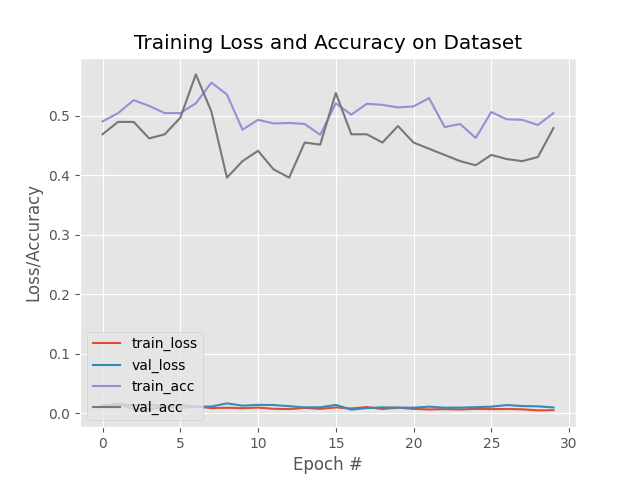

In [30]:
from IPython.display import Image
Image("output/plot.png")

In [27]:
# evaluate the network
from sklearn.metrics import confusion_matrix, classification_report
model = load_model("model/activity.model")
lb = pickle.loads(open("output/lb.pickle", "rb").read())

print("[INFO] evaluating network...")
predictions = model.predict(x=testX.astype("float32"), batch_size=32)
confusion_matrix(testY.argmax(axis=1), predictions)


[INFO] evaluating network...
10/10 [==============================] - 19s 2s/step


In [26]:
print('\nConfusion Matrix :\n\n')
print(confusion_matrix(testY, predictions.argmax(axis=1)))
print('\n\nClassification Report : \n\n',classification_report(testY, predictions.argmax(axis=1)))


Confusion Matrix :


[[101  81]
 [ 38  76]]


Classification Report : 

               precision    recall  f1-score   support

           0       0.73      0.55      0.63       182
           1       0.48      0.67      0.56       114

    accuracy                           0.60       296
   macro avg       0.61      0.61      0.60       296
weighted avg       0.63      0.60      0.60       296



In [2]:
from tensorflow.keras.models import load_model
from collections import deque
import numpy as np
import argparse
import pickle
import cv2

2022-06-09 11:15:56.317565: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-09 11:15:56.317601: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
print("[INFO] loading model and label binarizer...")
model = load_model("model/activity.model")
lb = pickle.loads(open("output/lb.pickle", "rb").read())

mean = np.array([123.68, 116.779, 103.939][::1], dtype="float32")
Q = deque(maxlen=1)

[INFO] loading model and label binarizer...


2022-06-09 11:16:12.970791: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-09 11:16:12.972192: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/stiven/python/python/lib/python3.8/site-packages/cv2/../../lib64:
2022-06-09 11:16:12.972347: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/stiven/python/python/lib/python3.8/site-packages/cv2/../../lib64:
2022-06-09 11:16:12.972472: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; 

# Test del modelo 

In [4]:
input_video = "test/normal_2.mp4"
out_video = "output/normal_2.mp4.avi"
vs = cv2.VideoCapture(input_video)
writer = None
(W, H) = (None, None)
while True:
    (grabbed, frame) = vs.read()
    if not grabbed:
        break
    if W is None or H is None:
        (H, W) = frame.shape[:2]
    output = frame.copy()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = cv2.resize(frame, (224, 224)).astype("float32")
    frame -= mean
    preds = model.predict(np.expand_dims(frame, axis=0), verbose=0)[0]
    Q.append(preds)
    results = np.array(Q).mean(axis=0)
    i = np.argmax(results)
    label = lb.classes_[i]
    text = "activity: {}".format(label)
    cv2.putText(output, text, (35, 50), cv2.FONT_HERSHEY_SIMPLEX,1.25, (0, 255, 0), 5)
    if writer is None:
        fourcc = cv2.VideoWriter_fourcc(*"MJPG")
        writer = cv2.VideoWriter(out_video, fourcc, 30,(W, H), True)
    writer.write(output)

print("[INFO] cleaning up...")
writer.release()
vs.release()

[INFO] cleaning up...
